# Coffee Price Predictor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("C:\\Users\Marquinoli\Documents\Datasets\coffee.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    object 
 2   Price_beef_kilo    360 non-null    float64
 3   Price_rice_kilo    360 non-null    float64
 4   Price_coffee_kilo  360 non-null    float64
 5   Inflation_rate     347 non-null    float64
 6   Price_rice_infl    347 non-null    float64
 7   Price_beef_infl    347 non-null    float64
 8   Price_coffee_infl  347 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB


In [5]:
df.describe()

,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
count,360.000000,360.000000,360.000000,360.000000,347.000000,347.000000,347.000000,347.000000
mean,2006.583333,3.152056,0.364083,2.999722,36.320029,0.476167,4.044006,3.953660
std,8.671906,1.167673,0.131201,1.164001,27.062804,0.135525,0.900393,1.460999
min,1992.000000,1.630000,0.160000,1.170000,-1.290000,0.240000,2.680000,1.770000
25%,1999.000000,2.117500,0.260000,2.265000,12.370000,0.390000,3.185000,3.065000
50%,2007.000000,2.730000,0.345000,2.940000,28.300000,0.460000,4.090000,3.680000
75%,2014.000000,4.220000,0.440000,3.605000,59.700000,0.550000,4.735000,4.565000
max,2022.000000,6.170000,0.910000,6.620000,89.590000,1.120000,6.930000,9.760000


In [6]:
df.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


### Cleaning the data
#### Drop the unnecessary columns


In [7]:
df = df.loc[:, ['Year', 'Month', 'Price_coffee_kilo', 'Inflation_rate', 'Price_coffee_infl'] ]

#### Check for null values and replace them

In [8]:
bool_series = pd.isnull(df['Inflation_rate'])
df[bool_series]

,Year,Month,Price_coffee_kilo,Inflation_rate,Price_coffee_infl
167,2006,Jan,2.74,NaN,NaN
168,2006,Feb,2.63,NaN,NaN
169,2006,Mar,2.51,NaN,NaN
170,2006,Apr,2.54,NaN,NaN
171,2006,May,2.41,NaN,NaN
172,2006,Jun,2.27,NaN,NaN
173,2006,Jul,2.31,NaN,NaN
174,2006,Aug,2.46,NaN,NaN
175,2006,Sep,2.42,NaN,NaN
176,2006,Oct,2.44,NaN,NaN


In [9]:
# Performed a "front fill" for the NaN values
df.fillna(method='ffill', inplace=True)

### Analyze the data

<AxesSubplot:>

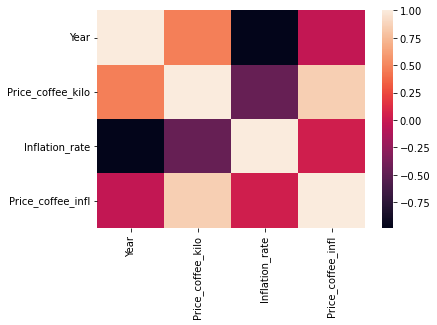

In [10]:
import seaborn as sns

sns.heatmap(df.corr())

##### The above heatmap shows that :
- There's a positive correlation between the year and the price of coffee
- There's a negative correlation between inflation rates and the price of coffee

#### Group data by decades

In [11]:
df_1990 = df[df['Year'].isin(range(1990, 2000))]
df_2000 = df[df['Year'].isin(range(2000, 2010))]
df_2010 = df[df['Year'].isin(range(2010, 2020))]
df_2020 = df[df['Year'] >= 2020]

#### Group data by all 30 years and examine the average price of coffee during each year

In [12]:
df_year = df.groupby(df['Year']).mean()

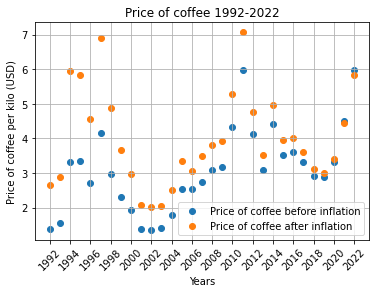

In [13]:
plt.scatter(df['Year'].unique(), df_year['Price_coffee_kilo'], label = 'Price of coffee before inflation')
plt.scatter(df['Year'].unique(), df_year['Price_coffee_infl'], label = 'Price of coffee after inflation')
plt.xlabel('Years')
plt.ylabel('Price of coffee per kilo (USD)')
plt.xticks( np.arange(1992, 2023, 2), rotation=45)
plt.grid(True)
plt.legend()
plt.title("Price of coffee 1992-2022")
plt.show()

##### The above graph shows that inflation affected the price the worst between 2010 and 2012

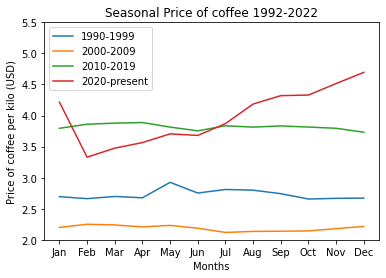

In [14]:
dates_in_order = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
months_in_order = dates_in_order.map(lambda x: x.month_name()).to_list()
months_in_order =[m[0:3] for m in months_in_order] #get just the first 3 letters of a month


# This is a helper function that helps me sort the months by name.
def sort_by_month(data):
    data.index = pd.CategoricalIndex(data['Month'], categories=months_in_order, ordered=True)
    data = data.sort_index().reset_index(drop=True)
    return data

# For each decade, plot the average price of coffee and group by months.
df_1990_month = df_1990.drop(columns = 'Year').groupby(df_1990['Month']).mean().reset_index()
df_1990_month = sort_by_month(df_1990_month)

df_2000_month = df_2000.drop(columns = 'Year').groupby(df_2000['Month']).mean().reset_index()
df_2000_month = sort_by_month(df_2000_month)

df_2010_month = df_2010.drop(columns = 'Year').groupby(df_2010['Month']).mean().reset_index()
df_2010_month = sort_by_month(df_2010_month)

df_2020_month = df_2020.drop(columns = 'Year').groupby(df_2020['Month']).mean().reset_index()
df_2020_month = sort_by_month(df_2020_month)



plt.plot(df_1990_month['Month'], df_1990_month['Price_coffee_kilo'], label='1990-1999')
plt.plot(df_2000_month['Month'], df_2000_month['Price_coffee_kilo'], label='2000-2009')
plt.plot(df_2010_month['Month'], df_2010_month['Price_coffee_kilo'], label='2010-2019')
plt.plot(df_2020_month['Month'], df_2020_month['Price_coffee_kilo'], label='2020-present')
plt.xlabel('Months')
plt.ylabel('Price of coffee per kilo (USD)')
plt.ylim(2, 5.5)
plt.legend()
plt.title('Seasonal Price of coffee 1992-2022')
plt.show()



##### The above graph shows that:
- Decades 2010-2019 and 2000-2009 were the most stable.
- The cheapest coffee was found during the 2000's decade.
- Coffee is most expensive in present-day.

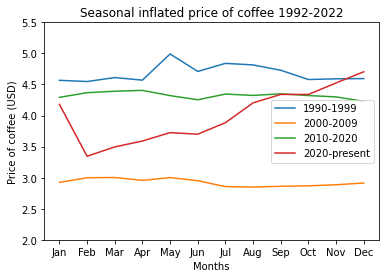

In [15]:
plt.plot(df_1990_month['Month'], df_1990_month['Price_coffee_infl'], label='1990-1999')
plt.plot(df_2000_month['Month'], df_2000_month['Price_coffee_infl'], label='2000-2009')
plt.plot(df_2010_month['Month'], df_2010_month['Price_coffee_infl'], label='2010-2020')
plt.plot(df_2020_month['Month'], df_2020_month['Price_coffee_infl'], label='2020-present')
plt.xlabel('Months')
plt.ylabel('Price of coffee (USD)')
plt.ylim(2, 5.5)
plt.legend()
plt.title('Seasonal inflated price of coffee 1992-2022')
plt.show()

##### The above graph shows that inflation was the highest during 1990-1999
### Compare the two most recent years before 2022

In [16]:
df_2020_single = df[df['Year'] == 2020]
df_2021_single = df[df['Year'] == 2021]

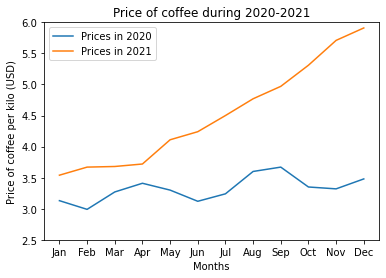

In [17]:
plt.plot(df_2020_single['Month'], df_2020_single['Price_coffee_kilo'], label='Prices in 2020')
plt.plot(df_2021_single['Month'], df_2021_single['Price_coffee_kilo'], label='Prices in 2021')
plt.xlabel('Months')
plt.ylabel('Price of coffee per kilo (USD)')
plt.legend()
plt.ylim(2.5,6.0)
plt.title('Price of coffee during 2020-2021')
plt.show()

##### The above graph shows that the price of coffee spikes dramatically throughout 2021 and continues to rise

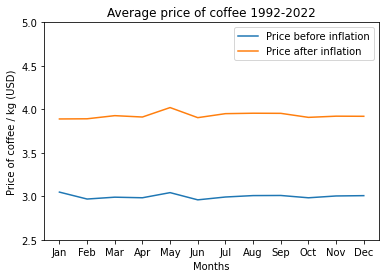

In [18]:
df_all_month = df.groupby(df['Month']).mean().reset_index()
df_all_month = sort_by_month(df_all_month)
df_all_month.drop(columns='Year', inplace=True)


  
plt.plot(df_all_month['Month'], df_all_month['Price_coffee_kilo'], label = 'Price before inflation')
plt.plot(df_all_month['Month'], df_all_month['Price_coffee_infl'], label = 'Price after inflation')
  

plt.xlabel("Months")
plt.ylabel("Price of coffee / kg (USD)")
plt.title("Average price of coffee 1992-2022")
plt.ylim(2.5, 5.0)
plt.legend()
plt.show()

##### On average, there is no significant relation between the price and the month.
##### We could maybe make the claim that May is when the coffee prices spike.

## Build the models

In [19]:
from sklearn.model_selection import train_test_split
df_model = df

In [26]:
# Convert month names to month numbers
from datetime import datetime
df_model['Month'] = df_model['Month'].apply(lambda x: datetime.strptime(x, '%b').month)
df_model

,Year,Month,Price_coffee_kilo,Inflation_rate,Price_coffee_infl
0,1992,2,1.51,89.59,2.86
1,1992,3,1.55,89.59,2.94
2,1992,4,1.45,89.59,2.75
3,1992,5,1.34,89.59,2.54
4,1992,6,1.30,89.59,2.46
...,...,...,...,...,...
355,2021,9,4.97,-1.29,4.91
356,2021,10,5.31,-1.29,5.24
357,2021,11,5.71,-1.29,5.64
358,2021,12,5.91,-1.29,5.83


#### Split the dataset into X and y values to train the model with

In [113]:
x_train, x_test, y_train, y_test = train_test_split(df_model[['Year', 'Month', 'Inflation_rate', 'Price_coffee_infl' ]], df_model[['Price_coffee_kilo']], test_size = 0.30, random_state = 0)


### Decision Tree Regressor Model

In [114]:
from sklearn.tree import DecisionTreeRegressor 
decision_tree_model = DecisionTreeRegressor(random_state = 1) 
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [115]:
decision_tree_predictions = decision_tree_model.predict(x_test)
print("Decision Tree Regressor R^2 score = ", decision_tree_model.score(x_test,y_test))


Decision Tree Regressor R^2 score =  0.9857677600843539


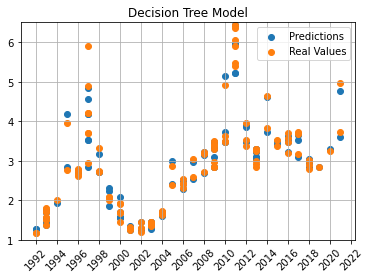

In [116]:
plt.scatter(x_test['Year'], decision_tree_predictions, label='Predictions')
plt.scatter(x_test['Year'], y_test['Price_coffee_kilo'], label='Real Values')
plt.ylim(1.0, 6.5)

plt.xticks(np.arange(1992, 2023, 2), rotation=45)
plt.legend()
plt.title('Decision Tree Model')
plt.grid(True)
plt.show()

##### The graph above describes how well the model performed compared to the real values

### Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_model.fit(x_train, y_train)

C:\Users\Marquinoli\AppData\Local\Temp\ipykernel_2164\840439651.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [119]:
random_forest_predictions = random_forest_model.predict(x_test)
random_forest_score = random_forest_model.score(x_test, y_test)
print("Random Forest Regressor R^2 score: ", random_forest_score)

Random Forest Regressor R^2 score:  0.9884100443202419


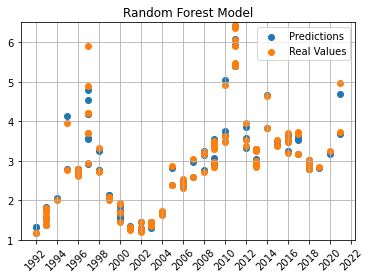

In [120]:
plt.scatter(x_test['Year'], random_forest_predictions, label='Predictions')
plt.scatter(x_test['Year'], y_test['Price_coffee_kilo'], label='Real Values')
plt.ylim(1.0, 6.5)

plt.xticks(np.arange(1992, 2023, 2), rotation=45)
plt.legend()
plt.title('Random Forest Model')
plt.grid(True)
plt.show()


##### It's not that easy to recognize, but we may infer that our Random Forest Regressor performed slightly better

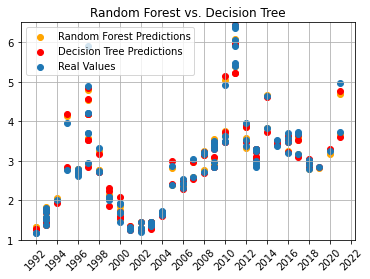

In [124]:
plt.scatter(x_test['Year'], random_forest_predictions, label='Random Forest Predictions', color='orange')
plt.scatter(x_test['Year'], decision_tree_predictions, label='Decision Tree Predictions', color='red')
plt.scatter(x_test['Year'], y_test['Price_coffee_kilo'], label='Real Values')
plt.ylim(1.0, 6.5)

plt.xticks(np.arange(1992, 2023, 2), rotation=45)
plt.legend()
plt.title('Random Forest vs. Decision Tree')
plt.grid(True)
plt.show()

#### Compare the 2 scores

In [126]:
print("Random Forest Regressor R^2 score: ", random_forest_score)
print("Decision Tree Regressor R^2 score: ", decision_tree_model.score(x_test,y_test))

Random Forest Regressor R^2 score:  0.9884100443202419
Decision Tree Regressor R^2 score:  0.9857677600843539
